# Iris dataset example

In [1]:
import huddles
import pandas as pd
from sklearn import datasets
from sklearn.manifold import TSNE

## Load the data

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
input_data = pd.DataFrame(iris.data, columns=iris.feature_names)
targets = pd.Series([iris.target_names[x] for x in iris.target]).rename("species")

In [3]:
print(f"Shape of the data: {input_data.shape}")
input_data.head()

Shape of the data: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
targets = targets.astype("category")
print(f"Shape of the target: {targets.shape}")
targets.value_counts(dropna=None)

Shape of the target: (150,)


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
# Preparing the DataFrame
full_dataset = pd.concat([input_data, targets], axis=1)

## Dimensionality Reduction

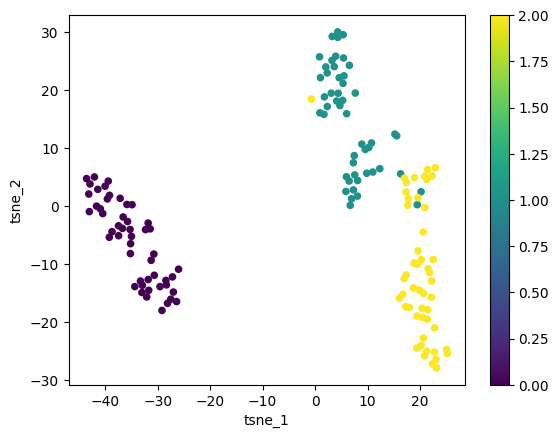

In [6]:
# Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=2, perplexity=10)
embeddings = tsne.fit_transform(input_data)
_ = pd.DataFrame(embeddings, columns=["tsne_1", "tsne_2"]).plot.scatter(
    x="tsne_1", y="tsne_2", c=targets.cat.codes, colormap="viridis"
)

## Explore 2D representation

In [7]:
# Explore the embedding with huddles
huddles.embedding_exploration_plot(embeddings, full_dataset, hue="species")

alt.HConcatChart(...)

In [ ]:
huddles.embedding_exploration_plot(embeddings, full_dataset, hue="sepal length (cm)")

TEST


alt.HConcatChart(...)

In [19]:
huddles.embedding_exploration_plot(embeddings, full_dataset)

alt.HConcatChart(...)